# Proyek Analisis Data: Nama Bike Sharing
- Nama: Yhenis Apriliana
- Email: yhenisapriliana@gmail.com
- Id Dicoding: Yhenis Apriliana

## Menentukan Pertanyaan Bisnis

- Apakah peminjaman sepeda dipengaruhi oleh season?
- Adakah hubungan antara jumlah peminjam sepeda dengan temperatur?

## Menyiapkan Semua Library yang Dibutuhkan

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [45]:
# Load package drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Masukan data day
day = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike Sharing/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [47]:
# Masukan data hour
hour = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike Sharing/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day`

In [48]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [49]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [50]:
print("Jumlah duplikasi: ", day.duplicated().sum())
day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour`

In [51]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [52]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [53]:
print("Jumlah duplikasi: ", hour.duplicated().sum())
hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### Cleaning `day`

In [54]:
day = day.rename(columns={'yr': 'year', 'weathersit': 'weather', 'hr': 'hour', 'hum': 'humadity', 'cnt': 'count'})
day.head()

,instant,dteday,season,year,mnth,holiday,weekday,workingday,weather,temp,atemp,humadity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Cleaning `hour`

In [55]:
hour = hour.rename(columns={'yr': 'year', 'weathersit': 'weather', 'hr': 'hour', 'hum': 'humadity', 'cnt': 'count'})
hour.head()

,instant,dteday,season,year,mnth,hour,holiday,weekday,workingday,weather,temp,atemp,humadity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Peminjaman sepeda berdasarkan season

In [56]:
season_analysis =  day.iloc[:, [2,13,14,15]]
season_analysis

,season,casual,registered,count
0,1,331,654,985
1,1,131,670,801
2,1,120,1229,1349
3,1,108,1454,1562
4,1,82,1518,1600
...,...,...,...,...
726,1,247,1867,2114
727,1,644,2451,3095
728,1,159,1182,1341
729,1,364,1432,1796


In [57]:
season_analysis['season'] = season_analysis['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
season_analysis

<ipython-input-57-1bae86461590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_analysis['season'] = season_analysis['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})


,season,casual,registered,count
0,spring,331,654,985
1,spring,131,670,801
2,spring,120,1229,1349
3,spring,108,1454,1562
4,spring,82,1518,1600
...,...,...,...,...
726,spring,247,1867,2114
727,spring,644,2451,3095
728,spring,159,1182,1341
729,spring,364,1432,1796


In [58]:
season_analysis.groupby('season').sum()

,casual,registered,count
season,,,
fall,226091,835038,1061129
spring,60622,410726,471348
summer,203522,715067,918589
winter,129782,711831,841613


### Hubungan antara user dengan temperatur

In [59]:
temp_analysis =  day.iloc[:, [9,13,14,15]]
temp_analysis

,temp,casual,registered,count
0,0.344167,331,654,985
1,0.363478,131,670,801
2,0.196364,120,1229,1349
3,0.200000,108,1454,1562
4,0.226957,82,1518,1600
...,...,...,...,...
726,0.254167,247,1867,2114
727,0.253333,644,2451,3095
728,0.253333,159,1182,1341
729,0.255833,364,1432,1796


In [60]:
temp_analysis.groupby('temp').sum()

,casual,registered,count
temp,,,
0.059130,93,888,981
0.096522,150,836,986
0.097391,86,1330,1416
0.107500,95,2273,2368
0.127500,73,1456,1529
...,...,...,...
0.834167,829,4634,5463
0.838333,670,3176,3846
0.848333,562,2825,3387


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah peminjaman sepeda dipengaruhi oleh season?

Text(0, 0.5, 'Jumlah Peminjaman Sepeda')

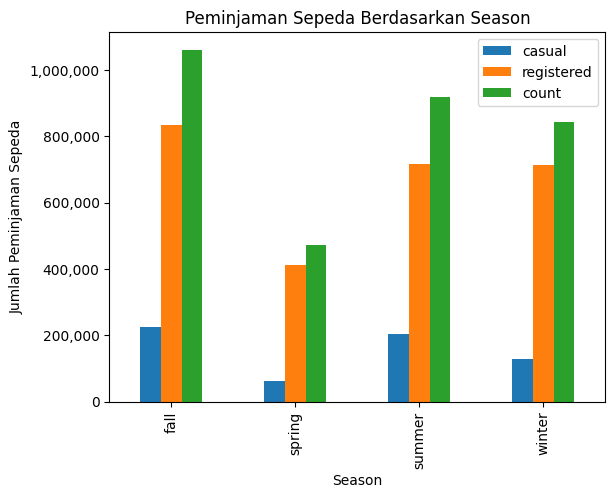

In [61]:
result_season = season_analysis.groupby('season').sum()
result_season.plot.bar()

from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))
plt.title('Peminjaman Sepeda Berdasarkan Season')
plt.xlabel('Season')
plt.ylabel('Jumlah Peminjaman Sepeda')

### Pertanyaan 2: Adakah hubungan antara jumlah peminjam sepeda dengan temperatur?

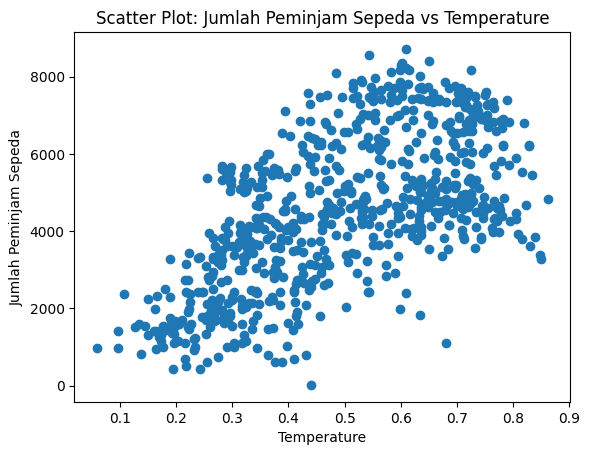

In [62]:
plt.scatter(day['temp'], day['count'])
plt.title('Scatter Plot: Jumlah Peminjam Sepeda vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Peminjam Sepeda')
plt.show()

In [63]:
# Regresi Linear
day['const'] = 1
model = sm.OLS(day['count'], day[['const', 'temp']])
results = model.fit()

In [64]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           2.81e-81
Time:                        10:35:58   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1214.6421    161.164      7.537      0.0

## Conclusion

### Conclution pertanyaan 1

Pada bar chart `Peminjaman Sepeda Berdasarkan Season` dapat dilihat bahwa season fall jumlah peminjaman sepeda memiliki tingkat yang paling banyak diantara season lainnya. Hal ini menunjukan bahwa season berpengaruh pada jumlah peminjaman sepeda

### Conlution pertanyaan 2

1. Model regresi linier menunjukkan bahwa terdapat hubungan yang signifikan antara temperatur dan jumlah peminjaman sepeda.
2. Koefisien positif pada temperatur menunjukkan bahwa seiring temperatur meningkat, jumlah peminjaman sepeda juga meningkat.